# Predicting with NN

In [1]:
from scipy.special import expit
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

from sklearn import svm
import pandas as pd
import numpy as np
import sklearn

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_theme(palette='colorblind')

<AxesSubplot: >

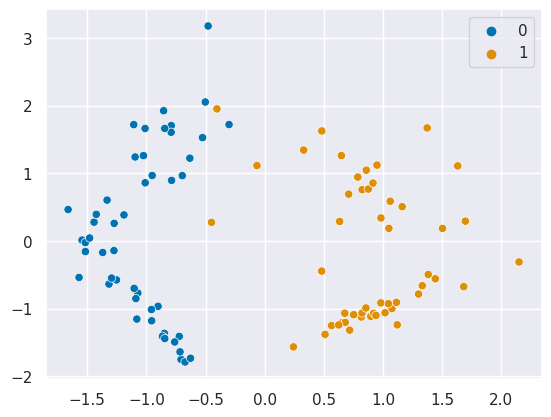

In [2]:
X, y = make_classification(n_samples=100, random_state=1,n_features=2,n_redundant=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y,
             random_state=1)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [3]:
clf = MLPClassifier(
 hidden_layer_sizes=(1), # 1 hidden layer, 1 aritficial neuron
 max_iter=100, # maximum 100 interations in optimization
 alpha=1e-4, # regularization
 solver="lbfgs", #optimization algorithm  
 verbose=10, # how much detail to print
 activation= 'identity' # how to transform the hidden layer beofore passing it to the next layer
)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85946D+00    |proj g|=  1.09353D+00

At iterate    1    f=  9.01337D-01    |proj g|=  5.66649D-01

At iterate    2    f=  5.05831D-01    |proj g|=  2.61325D-01

At iterate    3    f=  2.72372D-01    |proj g|=  2.63021D-01

At iterate    4    f=  9.63658D-02    |proj g|=  1.31404D-01

At iterate    5    f=  6.64410D-02    |proj g|=  4.59899D-02

At iterate    6    f=  6.28720D-02    |proj g|=  1.96007D-02

At iterate    7    f=  6.07977D-02    |proj g|=  1.45629D-02

At iterate    8    f=  5.32298D-02    |proj g|=  6.10463D-03

At iterate    9    f=  5.03893D-02    |proj g|=  1.29106D-02

At iterate   10    f=  4.87544D-02    |proj g|=  3.91832D-03

At iterate   11    f=  4.80908D-02    |proj g|=  2.51458D-03

At iterate   12    f=  4.79223D-02    |proj g|=  2.51300D-03

At iterate   13    f=  4.7

 This problem is unconstrained.


1.0

In [4]:
clf.activation

'identity'

In [5]:
clf.out_activation_

'logistic'

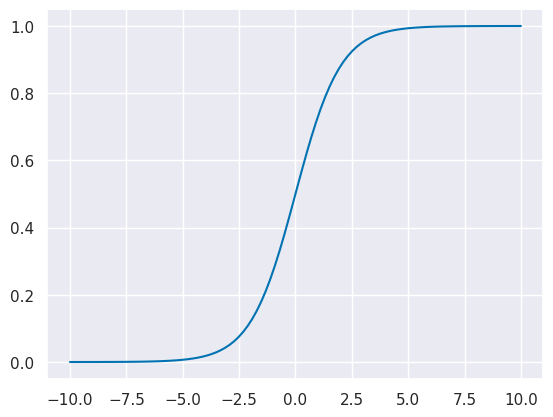

In [6]:
x_logistic = np.linspace(-10,10,100)
y_logistic = expit(x_logistic)
plt.plot(x_logistic,y_logistic)

In [7]:
clf.coefs_

[array([[-3.00254704],
        [ 0.08649153]]),
 array([[-4.37769901]])]

In [8]:
clf.intercepts_

[array([-1.27952135]), array([0.09587896])]

In [9]:
pt = np.array([[-1,2]])

In [10]:
expit((np.matmul(pt,clf.coefs_[0]) + clf.intercepts_[0])*clf.coefs_[1] + clf.intercepts_[1])

array([[0.00027341]])

In [11]:
clf.predict_proba(pt)

array([[9.99726593e-01, 2.73406710e-04]])

In [12]:
def aritificial_neuron_template(activation,weights,bias,inputs):
    '''
    simple artificial neuron

    Parameters
    ----------
    activation : function
    activation function of the neuron
    weights : numpy aray
    wights for summing inputs one per input
    bias: numpy array
    bias term added to the weighted sum
    inputs : numpy array
    input to the neuron, must be same size as weights

    '''
    return activation(np.matmul(inputs,weights) +bias)

# two common activation functions
identity_activation = lambda x: x
logistic_activation = lambda x: expit(x)

In [13]:
hidden_neuron = lambda x: aritificial_neuron_template(identity_activation,clf.coefs_[0],clf.intercepts_[0],x)
output_neuron = lambda h: aritificial_neuron_template(expit,clf.coefs_[1],clf.intercepts_[1],h)

output_neuron(hidden_neuron(pt))

array([[0.00027341]])

In [14]:
X, y = make_classification(n_samples=200, random_state=1,n_features=4,n_redundant=0,n_informative=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                          random_state=5)
pt_4d =np.asarray([[-1,-2,2,-1],[1.5,0,.5,1]])
clf_4d = MLPClassifier(
  hidden_layer_sizes=(1),
  max_iter=5000,
  alpha=1e-4,
  solver="lbfgs",
  verbose=10,
  activation= 'identity'
)

clf_4d.fit(X_train, y_train)


clf_4d.score(X_test, y_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36196D+00    |proj g|=  9.56112D-01

At iterate    1    f=  7.25630D-01    |proj g|=  1.37619D-01

At iterate    2    f=  7.02021D-01    |proj g|=  8.89373D-02

At iterate    3    f=  6.58862D-01    |proj g|=  1.01310D-01

At iterate    4    f=  5.96183D-01    |proj g|=  1.91630D-01

At iterate    5    f=  5.58427D-01    |proj g|=  1.98376D-01

At iterate    6    f=  5.22396D-01    |proj g|=  1.77482D-01

At iterate    7    f=  4.76942D-01    |proj g|=  1.53538D-01

At iterate    8    f=  4.36233D-01    |proj g|=  3.10315D-02

At iterate    9    f=  4.34744D-01    |proj g|=  5.83981D-03

At iterate   10    f=  4.34670D-01    |proj g|=  3.96325D-03

At iterate   11    f=  4.34657D-01    |proj g|=  3.94404D-04

At iterate   12    f=  4.34656D-01    |proj g|=  1.58455D-04

At iterate   13    f=  4.3

 This problem is unconstrained.


0.84

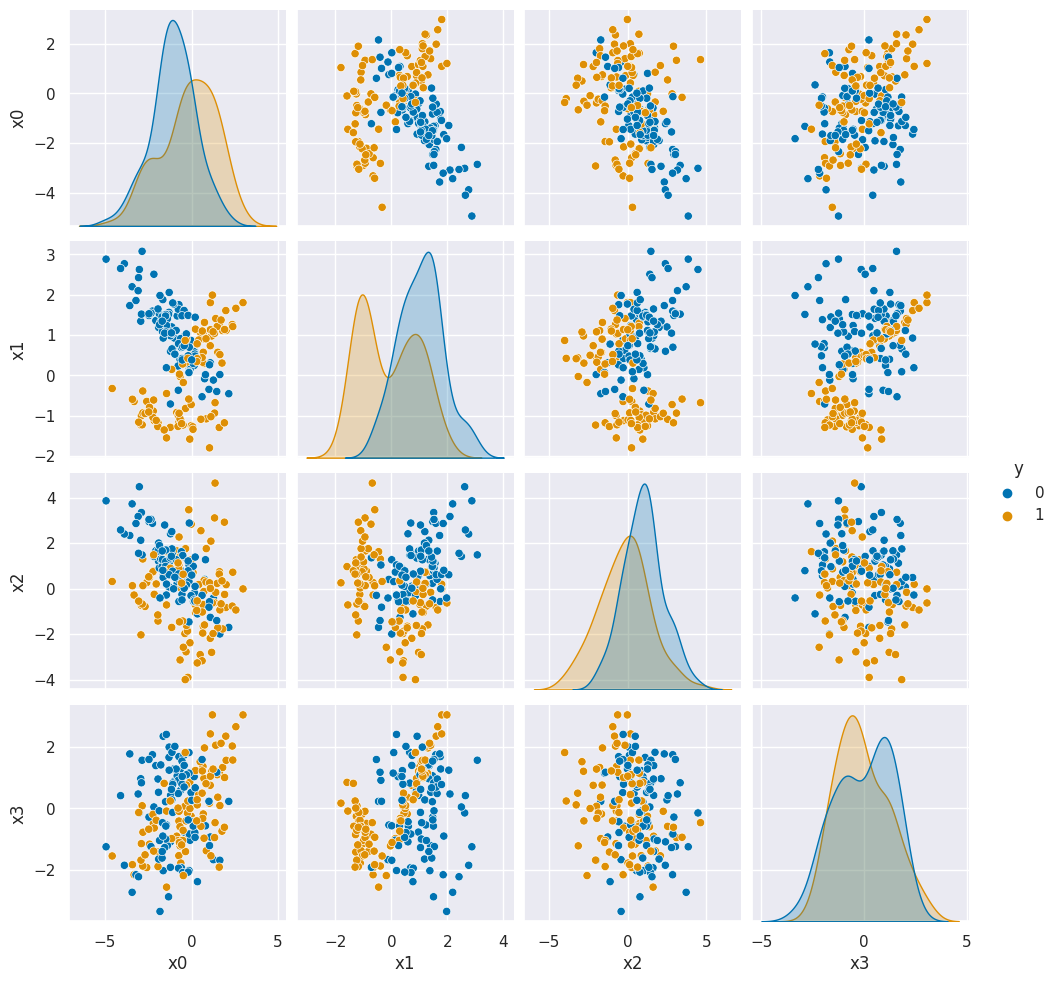

In [15]:
df = pd.DataFrame(X,columns=['x0','x1','x2','x3'])
df['y'] = y
sns.pairplot(df,hue='y')

In [16]:
hidden_neuron_4d = lambda x: aritificial_neuron_template(identity_activation,
                             clf_4d.coefs_[0],clf_4d.intercepts_[0],x)
output_neuron_4d = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d.coefs_[1],clf_4d.intercepts_[1],x)


output_neuron_4d(hidden_neuron_4d(pt_4d))

array([[0.95357657],
       [0.85332219]])

In [17]:
clf_4d.predict_proba(pt_4d)

array([[0.04642343, 0.95357657],
       [0.14667781, 0.85332219]])

In [18]:
clf_4d_4h = MLPClassifier(
  hidden_layer_sizes=(4),
  max_iter=500,
  alpha=1e-4,
  solver="lbfgs",
  verbose=10,
  activation='logistic'
)

clf_4d_4h.fit(X_train, y_train)


clf_4d_4h.score(X_test, y_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89838D-01    |proj g|=  5.26167D-02

At iterate    1    f=  6.72806D-01    |proj g|=  4.71775D-02

At iterate    2    f=  6.07420D-01    |proj g|=  5.12438D-02

At iterate    3    f=  5.36946D-01    |proj g|=  5.27346D-02

At iterate    4    f=  4.79622D-01    |proj g|=  4.10002D-02

At iterate    5    f=  4.56853D-01    |proj g|=  3.37297D-02

At iterate    6    f=  4.12587D-01    |proj g|=  3.07419D-02

At iterate    7    f=  3.87070D-01    |proj g|=  2.67146D-02

At iterate    8    f=  3.84406D-01    |proj g|=  7.09454D-02

At iterate    9    f=  2.79958D-01    |proj g|=  3.13522D-02

At iterate   10    f=  2.49370D-01    |proj g|=  2.96541D-02

At iterate   11    f=  2.32613D-01    |proj g|=  2.27441D-02

At iterate   12    f=  2.09833D-01    |proj g|=  8.89713D-03

At iterate   13    f=  1.9

 This problem is unconstrained.


0.92

In [19]:
hidden_neuron_4d_h0 = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[0][:,0],clf_4d_4h.intercepts_[0][0],x)
hidden_neuron_4d_h1 = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[0][:,1],clf_4d_4h.intercepts_[0][1],x)
hidden_neuron_4d_h2 = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[0][:,2],clf_4d_4h.intercepts_[0][2],x)
hidden_neuron_4d_h3 = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[0][:,3],clf_4d_4h.intercepts_[0][3],x)
output_neuron_4d_4h = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[1],clf_4d_4h.intercepts_[1],x)

In [20]:
output_neuron_4d_4h(np.asarray([hidden_neuron_4d_h0(pt_4d),
         hidden_neuron_4d_h1(pt_4d),
         hidden_neuron_4d_h2(pt_4d),
         hidden_neuron_4d_h3(pt_4d)]).T)

array([[1.        ],
       [0.89144911]])

In [21]:
clf_4d_4h.predict_proba(pt_4d)

array([[1.62092562e-14, 1.00000000e+00],
       [1.08550888e-01, 8.91449112e-01]])

## Questions

### Are there neural networks wherein each layer does a different type of transformation, such as logistic or identity?

There are different types of layers and some are defined by activations, others are more complex calculations in other ways.

### In the case of neural networks with multiple output neurons how do they handle multiple output neurons being 1